# Study of PCM, DPCM, and DM

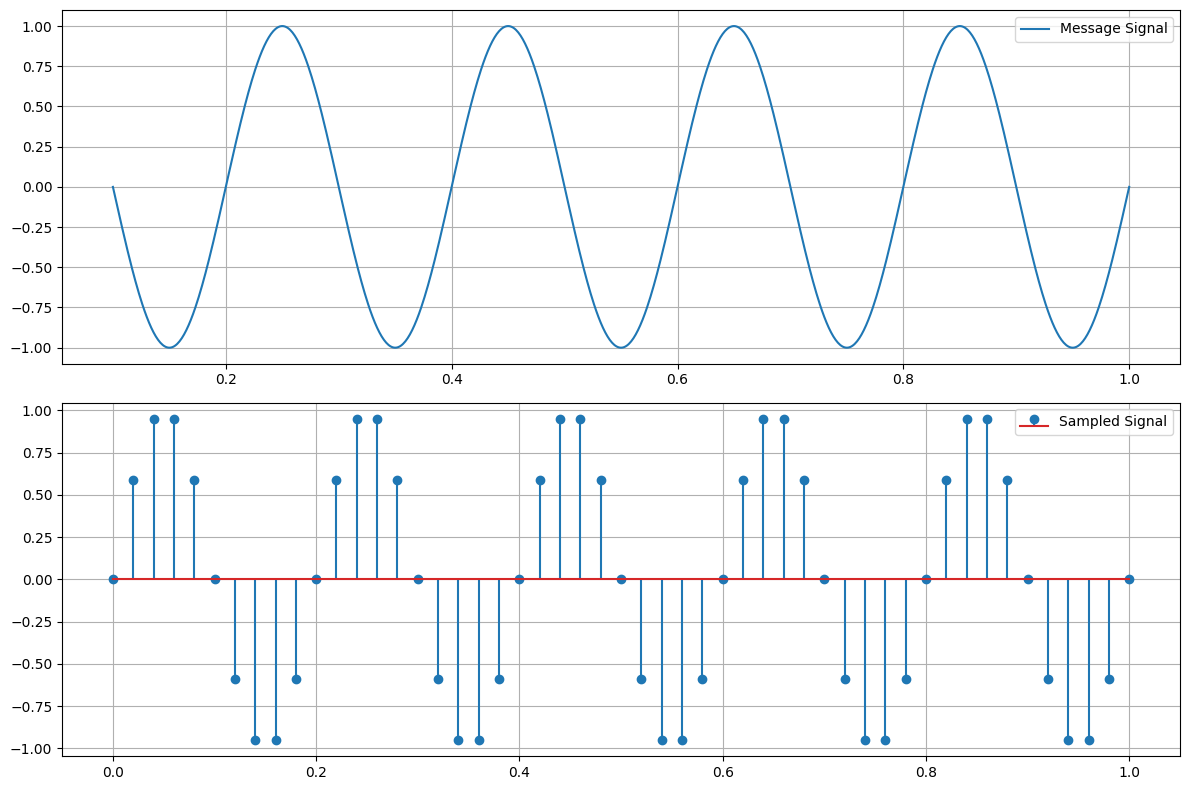

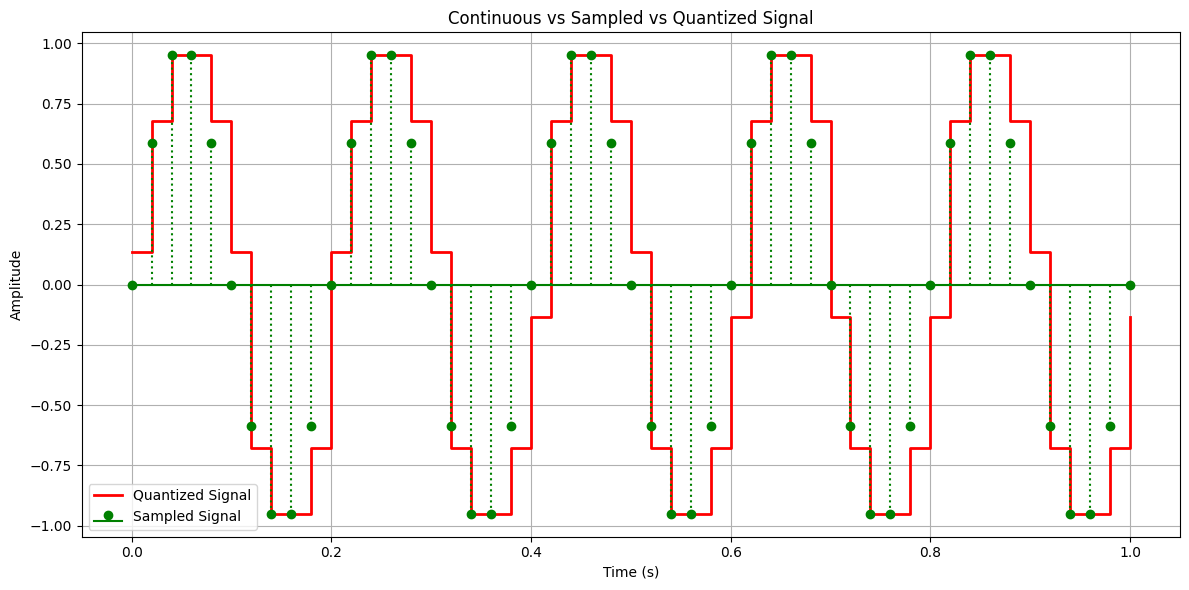

Sampled value  ->  Quantized level  ->  Binary code
0.00  ->  4  ->  100
0.59  ->  6  ->  110
0.95  ->  7  ->  111
0.95  ->  7  ->  111
0.59  ->  6  ->  110
0.00  ->  4  ->  100
-0.59  ->  1  ->  001
-0.95  ->  0  ->  000
-0.95  ->  0  ->  000
-0.59  ->  1  ->  001


In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

fs1 = 1000
f_msg = 5

t1 = np.arange(0.1, 1 + 1 / fs1, 1 / fs1)
message_signal = np.sin(2 * np.pi * f_msg * t1)

plt.subplot(2, 1, 1)
plt.plot(t1, message_signal, label="Message Signal")
plt.grid(True)
plt.legend()

fs2 = 50
t2 = np.arange(0, 1 + 1 / fs2, 1 / fs2)
sampled_signal = np.sin(2 * np.pi * f_msg * t2)

plt.subplot(2, 1, 2)
plt.stem(t2, sampled_signal, label="Sampled Signal")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Quantization
N = 8  # Number of quantization levels (3-bits)
x_min = min(sampled_signal)
x_max = max(sampled_signal)
delta = (x_max - x_min) / (N - 1)

# For each sample, the nearest quantization level
q_index = np.round((sampled_signal - x_min) / delta)
q_index = np.clip(q_index, 0, N - 1)

quantized_signal = x_min + q_index * delta

# Plot sampled and quantized signals together
plt.figure(figsize=(12, 6))
plt.step(t2, quantized_signal, "r-", where="post", label="Quantized Signal", linewidth=2)
plt.stem(
    t2, sampled_signal, linefmt="g:", markerfmt="go", basefmt="g-", label="Sampled Signal"
)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Continuous vs Sampled vs Quantized Signal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Encoding
level_indices = q_index.astype(int)
n_bits = int(np.log2(N))

# Convert each index to binary string
binary_codes = [format(i, f'0{n_bits}b') for i in level_indices]

# Display first few codes
print("Sampled value  ->  Quantized level  ->  Binary code")
for i in range(10):
    print(f"{sampled_signal[i]:.2f}  ->  {level_indices[i]}  ->  {binary_codes[i]}")

In [30]:
# ERROR

mse = np.mean((sampled_signal - quantized_signal)**2)
print("Mean Square Error:", mse)


Mean Square Error: 0.007267596116105793


# Differential Pulse Code Modulation

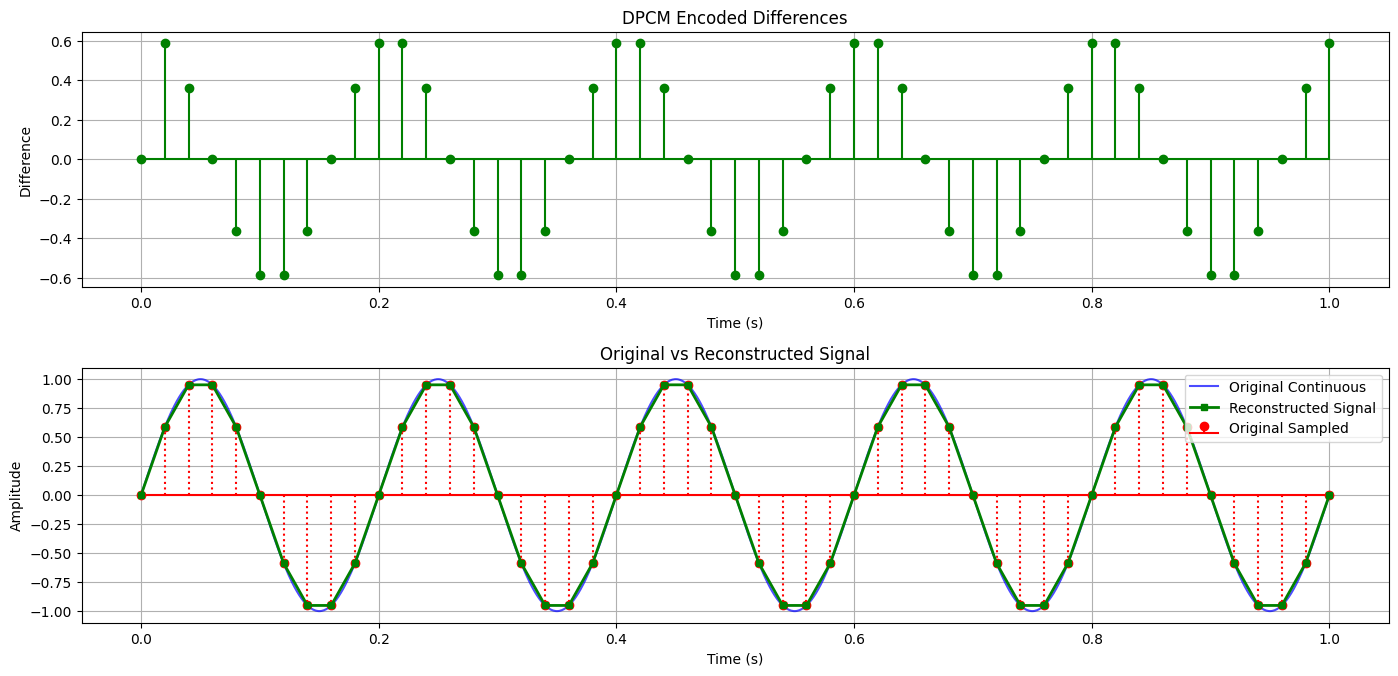

Number of samples: 51
Max DPCM encoded value: 0.5878
Reconstruction error: 0.1358652166


In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Sampling parameters
fs_continuous = 1000  
fs_sampling = 50     
t_continuous = np.arange(0, 1 + 1 / fs_continuous, 1 / fs_continuous)
t_sampled = np.arange(0, 1 + 1 / fs_sampling, 1 / fs_sampling)

f = 5  
y_continuous = np.sin(2 * np.pi * f * t_continuous)
y_sampled = np.sin(2 * np.pi * f * t_sampled)

# Quantization
N = 8  # Number of quantization levels

x_min = min(y_sampled)
x_max = max(y_sampled)

delta = (x_max - x_min) / (N - 1)
q_index = np.round((y_sampled - x_min) / delta)
q_index = np.clip(q_index, 0, N - 1)

y_quantized = x_min + q_index * delta

# DPCM Encoding
length = len(y_quantized)
y_predicted = 0  
dpcm_encoded = np.zeros(length)

for index in range(length):
    diff = y_sampled[index] - y_predicted
    dpcm_encoded[index] = diff
    y_predicted += diff

dpcm_encoded = np.array(dpcm_encoded)

# DPCM Decoding (Reconstruction)
y_reconstructed = np.zeros(length)
reconstructed_value = 0  

for index in range(length):
    reconstructed_value += dpcm_encoded[index]
    y_reconstructed[index] = reconstructed_value

plt.figure(figsize=(14, 10))

# DPCM Encoded Differences
plt.subplot(3, 1, 2)
plt.stem(t_sampled, dpcm_encoded, linefmt='g-', markerfmt='go', basefmt='g-')
plt.xlabel('Time (s)')
plt.ylabel('Difference')
plt.title('DPCM Encoded Differences')
plt.grid(True)

# Reconstructed Signal vs Original
plt.subplot(3, 1, 3)
plt.plot(t_continuous, y_continuous, 'b-', label='Original Continuous', 
         linewidth=1.5, alpha=0.7)
plt.stem(t_sampled, y_sampled, linefmt='r:', markerfmt='ro', basefmt='r-', 
         label='Original Sampled')
plt.plot(t_sampled, y_reconstructed, 'g-', marker='s', markersize=5, 
         label='Reconstructed Signal', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Reconstructed Signal')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print statistics
print(f"Number of samples: {length}")
print(f"Max DPCM encoded value: {np.max(np.abs(dpcm_encoded)):.4f}")
print(f"Reconstruction error: {np.max(np.abs(y_quantized - y_reconstructed)):.10f}")

# Delta Modulation